'21.9 기출

큰 2문제로 기계학습 50점 통계분석 50점 출제

 

1. 기계학습

피마 인디언 당뇨 데이터

특징 : 데이터에 헤더가 없음, 대신 시험지에 변수명 제공

 

1.1 데이터 탐색

1.1.1 탐색적 데이터 분석 수행하시오(시각화 포함)

- info(), describe(), 독립변수 전체 히스토그램, 타겟 분포 그래프(불균형 확인), 변수 전체 상관관계 및 히트맵, pairplot, 결측치 확인 및 시각화 등

 

1.1.2 이상치 처리하시오

- descsribe, pairplot 에서 이상치 식별 가능했기 때문에 논리적으로 다음 작업으로 타당하였음. inter quantile range 사용할 수 있었으나 EDA 단계에서 보기에 단일 변수의 분포에서 크게 벗어나는 99999, 999 등의 값이 1개 혹은 2개로 존재하는 경우가 많았고, 이는 의도적으로 이상치를 변수 범위에서 크게 벗어나도록 1개 내지 2개를 심어놓은듯한 모습이었음. 또한 나이 변수의 경우 최대값이 999였으므로 다음 최대값인 81로 상식적인 변경이 가능한 경우가 있었음. 즉 IQR(25%선 밑 75%선 위를 이상치로 보기에)을 적용하기에는 데이터에 대한 너무 큰 변환이라고 판단했고 IQR을 사용할 수 있었음을 설명하고 다음 규칙 기반으로 모든 변수에 대해 이상치 처리함

1) 단일변수 백분위에서 1%단위마다 위치하는 값 표시(변수.quantile(np.arange(0,1,0.01))

2) 단일변수 MIN, MAX값 확인

3) 단일변수 히스토그램 확인(크게 벗어난 위치 확인)

4) scatter plot에서 크게 벗어나는 한 개로 확인되면 다음 MAX값으로 변환

5) 상식적 판단 : age등은 21~81 까지 분포했으므로 999를 81로 변환하는 것으로 마무리

6) 상식적 판단 : 측정 수치등은 0이 나올 수 없으므로 1)확인 후 다음 MIN 값으로 변경

 

1.1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

- 결측치 없음, 이상치 있음, 히스토그램 관찰시에 0부분이 모든 독립 변수에서 솟은 형태가 나타나므로 이미 결측치를 0으로 채운 데이터일 수도 있음을 짐작해볼 수 있음. EDA에서 변수에 소수점 값들이 있는 경우가 있으나 큰 의미가 없다고 판단되므로 정수 변환 고려해야함. (152.83, 152.72의 차이에 큰 의미가 없다고 판단함, 물론 0.2345 0.7234의 값을 갖는 변수에 대한 얘기는 아님) 선형 모델 사용시 스케일링 고려해야 함, 타겟 분포가 극심하지는 않으나 불균형함. (대략 우세 클래스 500 열세 238) 상관관계 확인 결과 변수의 효과가 거의 동일한 경우 관찰되어(0.99) 제거 고려해볼 수 있음 등

 

2.1 클래스 불균형을 처리하시오

2.1.1 업 샘플링 과정 설명하고 결과 작성

- imblearn 사용, EDA에서 이미 문제 알고 있었으므로 자연스러운 흐름임. up sampling은 소수 클래스를 늘려서 다수 클래스 개수에 맞춤. random방식과 smote방식 설명하고, 비교하였음

2.2.2 언더 샘플링 과정 설명하고 결과 작성

- imblearn 사용, 언더 샘플링은 다수 클래스를 줄여서 소수 클래스 개수에 맞춤. random방식과 tomeklink방식 설명하고, 비교하였음

2.2.3 둘 중 선택하고 이유 설명

- 둘 중 선택한다면 tomeklink를 선택한다고 하였음. 랜덤 다운 샘플링 방식은 다수 클래스에서 랜덤 샘플링을 통해 소수 클래스 숫자에 끌어당겨 맞추기 때문에 정보 손실이 많음(500개->238개). 랜덤 업 샘플링은 정보 손실이 없지만 중복 관측치가 생기게 됨. 둘 다 언더 피팅과 오버 피팅에 대한 우려를 만들어내게 됨. 굳이 고른다면 tomeklink를 통한 언더샘플링 방법 택한다고 했음. 이유는 정보 손실 최소화(500개->460개) 하면서 소수 클래스의 비율을 3%가량 증가시킬 수 있었기 때문임. 물론 smote는 knn을 통해 생성한 관측치이기 때문에 중복 생성을 안하므로 사용에 유리하겠지만, EDA에서 타겟과의 상관관계 등을 들어 타겟 불균형으로 인해 예측이 안될 정도(열세 클래스를 늘려야 할 정도로)는 아니라고 판단하였다고 작성함.

 

그러나 가장 좋은 방법이라면 둘 다 하지 않겠다고 추가 작성하였음. 현실에서는 클래스 불균형이 극심한 경우가 많은데 판단하기에 7:3의 클래스 비율이 학습이 안될 정도는 아니고, 데이터에 임의의 변환을 가하는 것은 정보 손실이나 과적합의 문제를 동반하기 때문에 더욱 위험하다고 생각했다고 하였음. 즉 원 데이터에 파생변수를 생성하는 것을 제외한 변환을 가하는 것이 온전한 분석은 아니기에 지양한다고 함.

 

3.1 모델링 하시오

3.1.1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

- 선형 알고리즘, 배깅 알고리즘, 부스팅 알고리즘에 대해 설명하였음.

- 파생변수 생성하였음 사칙연산, 연속형 binning, 범주형 빈도 카운트 변수 등 그냥 반사적으로 생각난 것들만 빠르게 수행함

- 각각의 모델로는 logistic regression, random forest, xgboost 사용하였음.

 

3.1.2 모델 비교하고 결과 설명

- 타겟 불균형 문제가 계속 언급되고, 전체 데이터 관측치 수가 적다고 판단하여 5fold stratifiedkfold 사용하였음.

- %time으로 fit, predict 시간 각각 측정하고 cross_val_score사용해서 모델별 mean accuracy 출력하였음.

- 정확도 측면에선 xgboost 속도에선 logistic이 좋았음, 그러나 정확도도 속도도 유의미한 차이라고 보기에는 어려움이 있다고 함. 하지만 향후에 데이터 관측치가 더 수집되고, 추가적인 변수들이 생겨서 더 복잡한 모델을 사용하게 된다면 그 때는 유의미한 비교가 될 수 있을거 같다고 씀.

 

3.1.3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

- pca 개념 설명하고 주로 사용하는 이유 설명함. scaling 필요한 이유 설명하였음, standardscaler 적용하였음. 

- scaling, pca 모두 적용시에 test leakage 조심해야된다고 했음. (전체에 fit transform하면 안된다고)

- 설명 분산 누적 90%로 설정하였음. 

- 요약된 주성분이 전체 데이터의 93%를 설명한다고 하였음.

- 예측 성능 다소 하락 관찰되고 속도에도 차원축소에 의한 유의미한 차이가 없으나, 향후에 데이터가 크게 늘어난다면 이러한 차원 축소적인 접근이 의미가 있을거라고 작성했음.

 

2. 통계분석

 

1.1 금속 성분 함유량 변수 1개. (1열 데이터) 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고있는데, 제조사별로 차이가 난다고 제보를 받음 분산에 대해 검정을 수행하시오.

1.1.1 연구가설과 귀무가설 작성

1.1.2 양측 검정 어쩌고

1.1.3 검정통계량, 가설 채택

 

2.1 Lot별 불량 제품 수량 데이터. lot 번호와 불량제품수 두 개의 열. 각 lot별 200개에 대한 불량제품 수.

2.1.1  p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오

2.1.2 관리도 시각화 하시오

- 시각화는 구글에 python control chart 검색하면 많이 나오고, 결국 관리도가 생소한 말이지만, 관리 중심선 = 평균, 관리 상한선과 하한선은 평균 기준 3표준편차씩 거리에 위치한 선입니다. 

 

3.1 데이터 없음. 표에 제품 1,2를 만드는데 사용되는 재료 a b c 컬럼 있고 재료에 따라 최종 만들어지는 제품  두 개에 대한 수량 있음. 최하단 행에는 수익이 있음. 제품 수량을 최대로 뽑으면서 수익이 최적이 되도록 하라고 함.(10점)

 

4.1 데이터 없음. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. aa bb bbbb aa aaa bb bbb aa bb a b 정확히 기억 안나지만 대충 비슷함. 

4.1.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오

4.1.2 연구가설 귀무가설 세우시오

4.1.3 가설 채택하시오

- runs test, 무작위성을 검정하기 위한 방법으로 귀무가설은 표본이 무작위로 추출되었다 입니다. statsmodels.sandbox.stats.runs import runstest_1samp, runtest_2samp를 사용할 수 있습니다. 

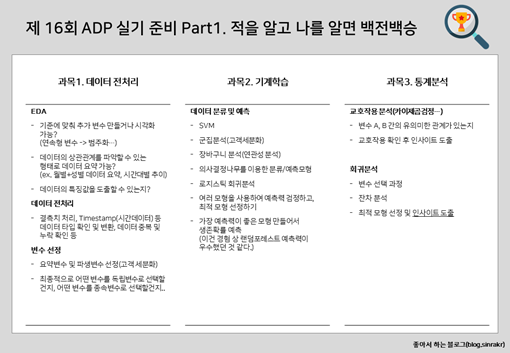

### 21회 ###
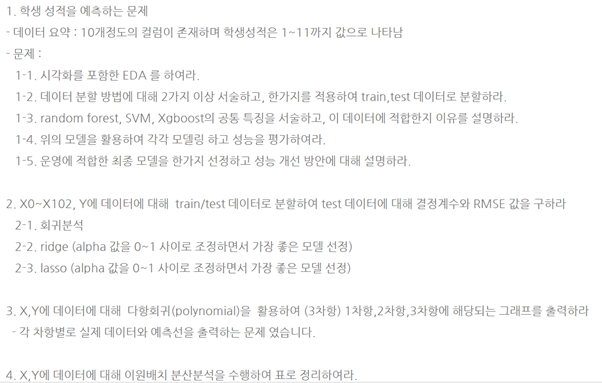

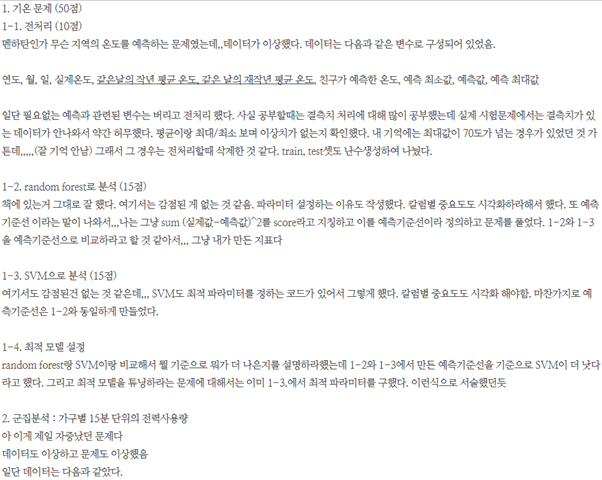

### 18회 ###
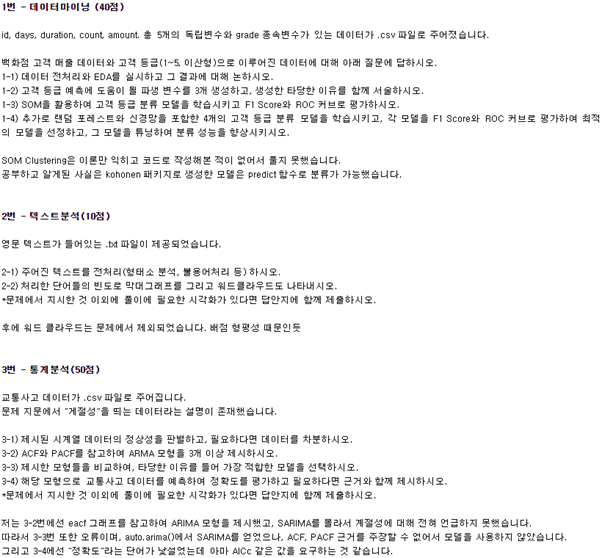

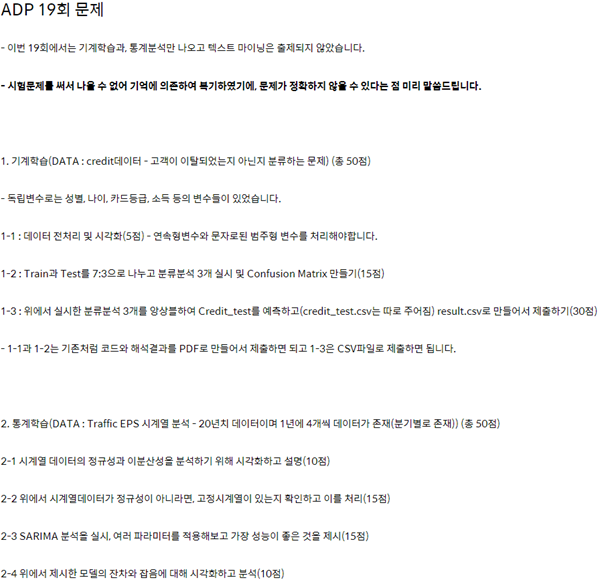

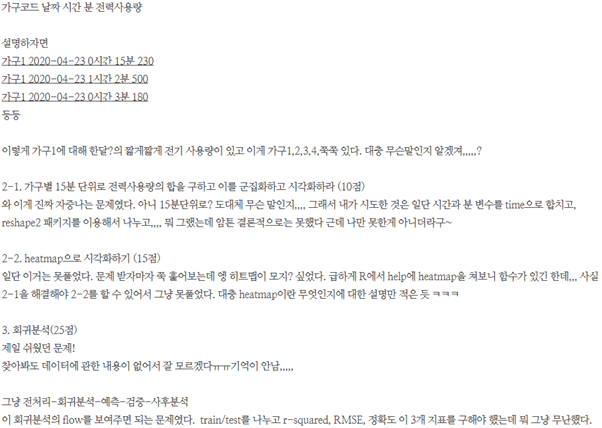

### 기타 기출 문제 ###
데이터셋 분할방법(train:valid:test를 7:2:1로 나누기 – 종속변수의 비율이 이와 같아야함)

회귀식 교호작용을 고려한 회귀분석 - preprocessing 모듈의 polynomialfeatures 활용